### Life cycle of Machine learning Project
1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model

#### 1. Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


#### 2. Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

##### 2.1 Import Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/raw.csv')
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1001, 8)

##### 2.2  Dataset Information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)- 
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

#### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

##### 3.1 Check Missing Values

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

NO missing values found

##### 3.2 Check Duplicate

In [6]:
df.duplicated().sum()


1

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

Duplicate recod has been deleted 

##### 3.3 Check Data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 70.3+ KB


##### 3.4 number of unique values in each column

In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

##### 3.5 check statistics of Data

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### 3.6 explore Data

In [12]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(f'unique values of {i}  = {df[i].unique()}')

unique values of gender  = ['female' 'male']
unique values of race/ethnicity  = ['group B' 'group C' 'group A' 'group D' 'group E']
unique values of parental level of education  = ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
unique values of lunch  = ['standard' 'free/reduced']
unique values of test preparation course  = ['none' 'completed']


In [14]:
# define Numerical and Categorical features

cat_feature = [feature for feature in df.columns if df[feature].dtype == 'object' ]
num_feature = [feature for feature in df.columns if df[feature].dtypes != 'object']

In [15]:
print(cat_feature)
print(num_feature)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
['math score', 'reading score', 'writing score']


##### 3.8 Adding Columns for 'total score' and 'average'

In [16]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['avg_socre'] = df['total_score'] / 3
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_socre
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


#### 4. Visualizing Data

##### 4.1 Visualize average score distibution to make some conclusion

###### Histogram

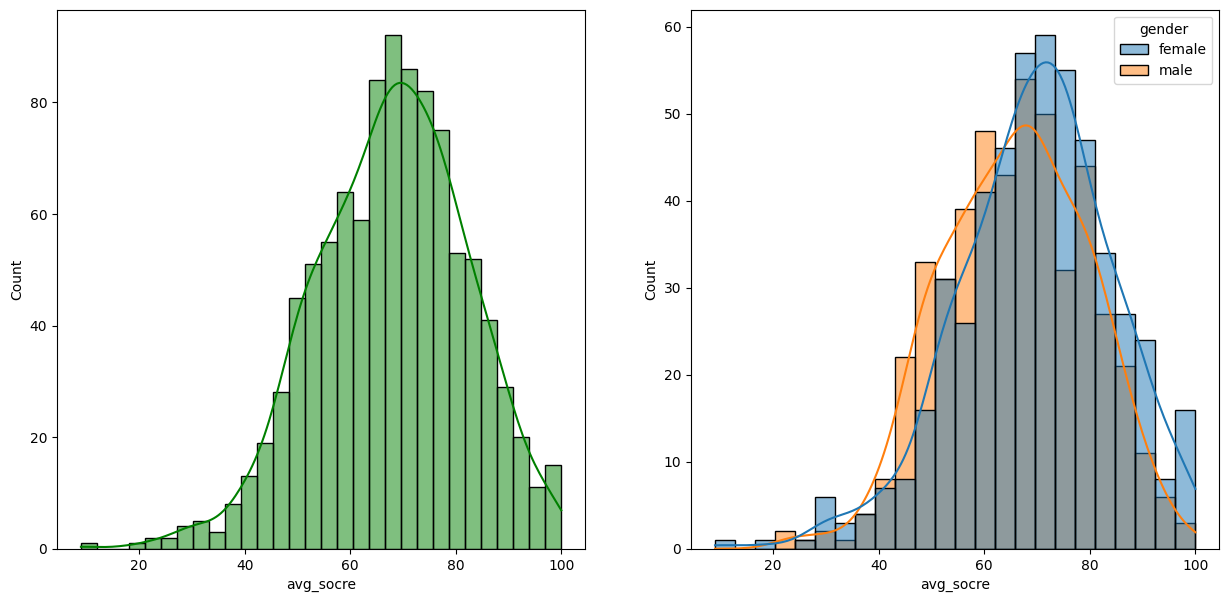

In [17]:
fig,axs =plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df,x ='avg_socre',bins = 30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data = df,x = 'avg_socre',kde=True,hue='gender')
plt.show()

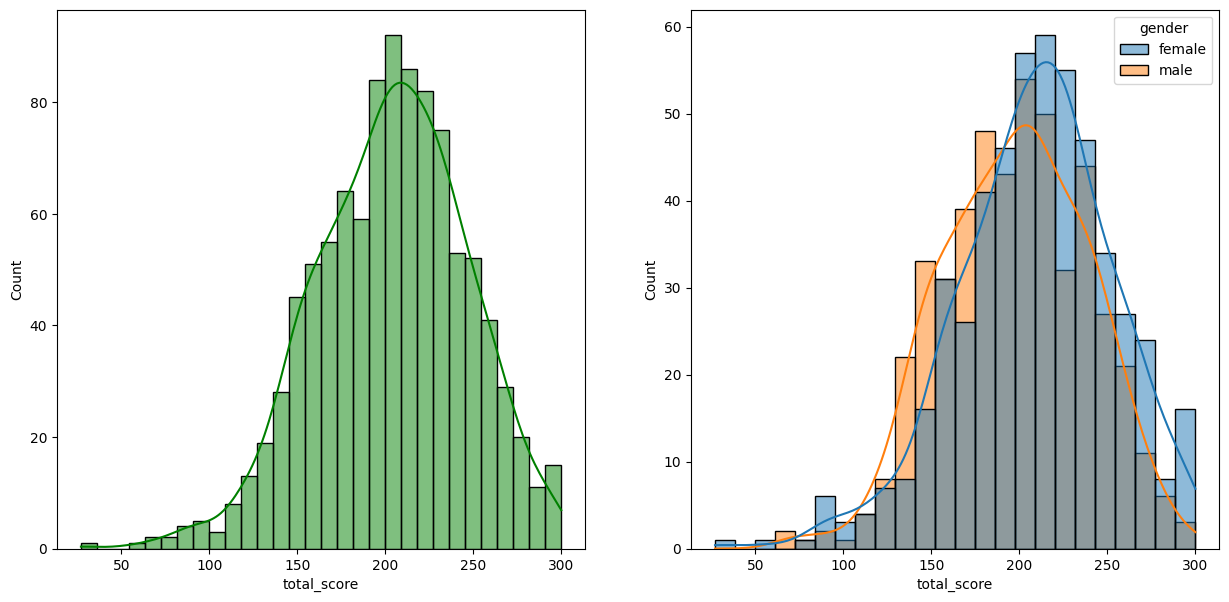

In [18]:
fig,axs = plt.subplots(1,2,figsize = (15,7))

plt.subplot(121)
sns.histplot(data = df,x = 'total_score',bins = 30,kde = True,color='g')
plt.subplot(122)
sns.histplot(data = df,x = 'total_score',kde = True,hue='gender')
plt.show()

insights : Female students tends to perform well in Exam

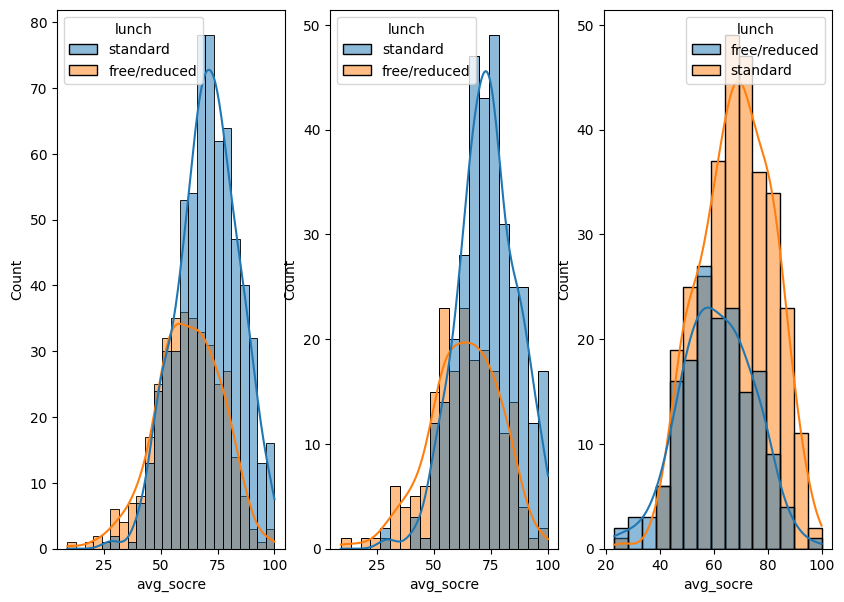

In [19]:
fig,ax = plt.subplots(1,3,figsize = (10,7))
plt.subplot(131)
sns.histplot(data = df,x = 'avg_socre',kde = True,hue='lunch')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'],x = 'avg_socre',hue = 'lunch',kde=True)
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'],x = 'avg_socre',hue='lunch',kde = True)
plt.show()

insights : Standard Lunch helps students to perform well in exam

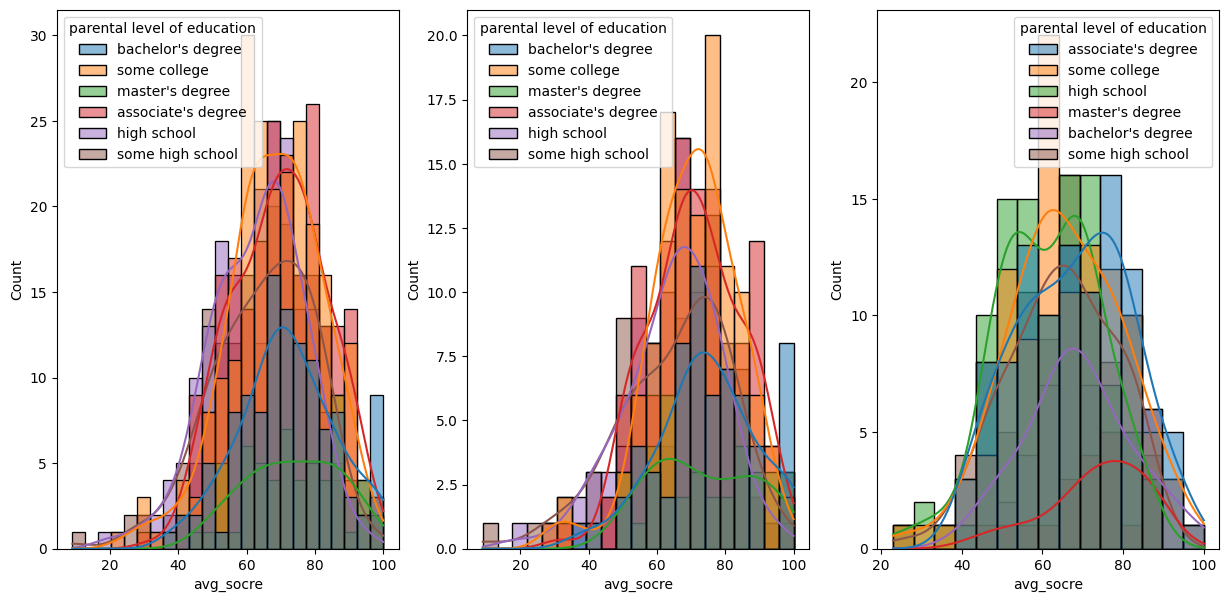

In [20]:
fig,ax = plt.subplots(1,3,figsize = (15,7))
plt.subplot(131)
sns.histplot(data = df,x = 'avg_socre',kde = True,hue='parental level of education')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'],x = 'avg_socre',hue = 'parental level of education',kde=True)
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'],x = 'avg_socre',hue='parental level of education',kde = True)
plt.show()

Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

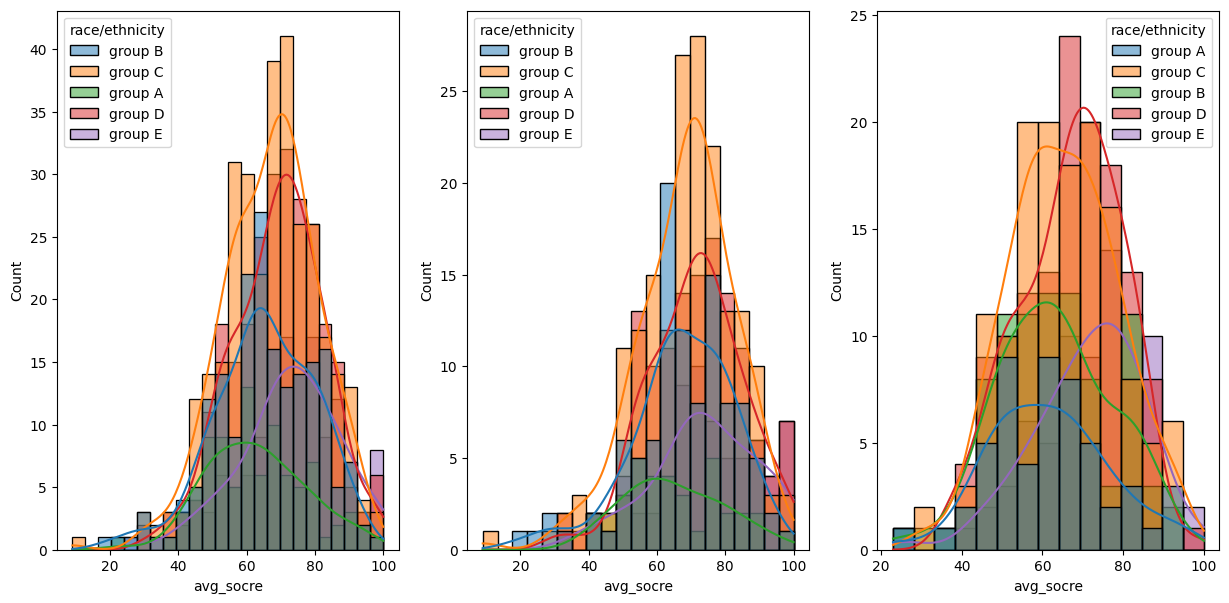

In [21]:
fig,ax = plt.subplots(1,3,figsize = (15,7))
plt.subplot(131)
sns.histplot(data = df,x = 'avg_socre',kde = True,hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'],x = 'avg_socre',hue = 'race/ethnicity',kde=True)
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'],x = 'avg_socre',hue='race/ethnicity',kde = True)
plt.show()

Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

##### 4.2 Maximum socre of students in all three subjects

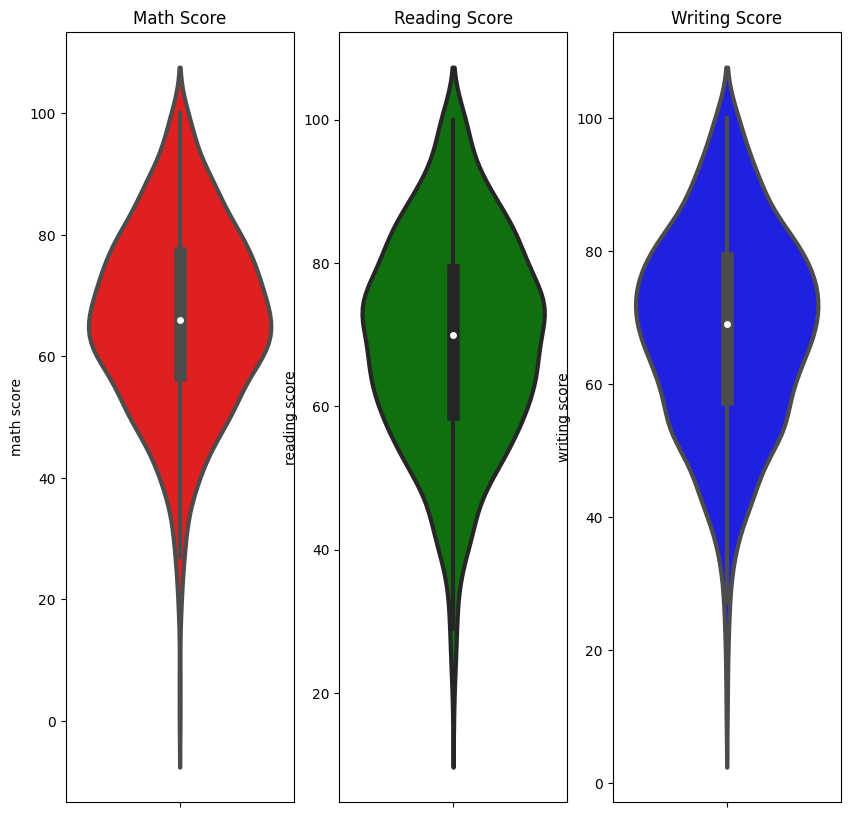

In [22]:
fig,axs = plt.subplots(1,3,figsize = (10,10))
plt.subplot(131)
plt.title('Math Score')
sns.violinplot(data = df,y = 'math score',color='red',linewidth=3)
plt.subplot(132)
plt.title('Reading Score')
sns.violinplot(data = df,y = 'reading score',color='green',linewidth=3)
plt.subplot(133)
plt.title('Writing Score')
sns.violinplot(data = df,y = 'writing score',color='blue',linewidth=3)
plt.show()

Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

##### 4.3 Multivariate analysis using pieplot

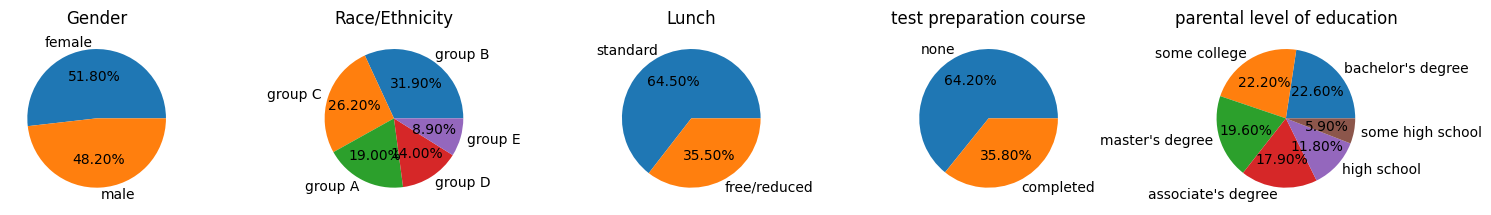

In [23]:
plt.figure(figsize=(15,15))
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = ['female','male']
plt.pie(size,labels=labels,autopct='%.2f%%')
plt.title('Gender')

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = df['race/ethnicity'].unique()
plt.pie(size,labels = labels,autopct='%.2f%%')
plt.title('Race/Ethnicity')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = df['lunch'].unique()
plt.pie(size,labels = labels,autopct='%.2f%%')
plt.title('Lunch')

plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels = df['test preparation course'].unique()
plt.pie(size,labels = labels,autopct='%.2f%%')
plt.title('test preparation course')

plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
labels = df['parental level of education'].unique()
plt.pie(size,labels = labels,autopct='%.2f%%')
plt.title('parental level of education')

plt.tight_layout()
plt.show()



##### 4.4 Feature wise Visualization

###### 4.4.1 Gender col

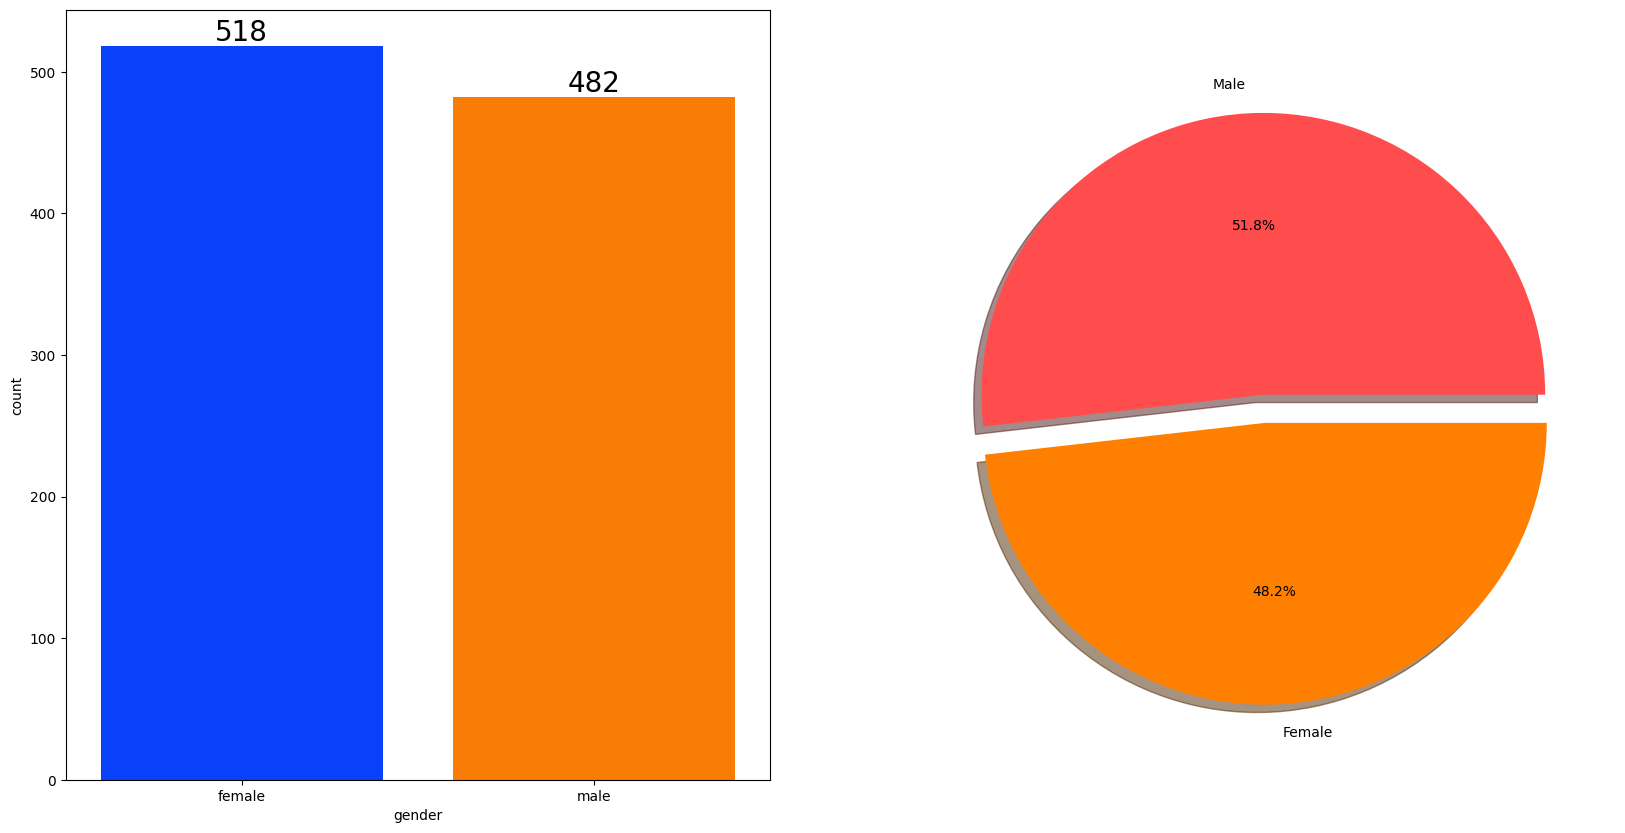

In [24]:
# univariate analysis
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_socre
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333
